# Data Analysis

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [206]:
tokyo_data = pd.read_csv('../data/TOKYO_DAILY_CLIMATE_BEST_Jan14May24.csv')

tokyo_data['Date'] = pd.to_datetime(tokyo_data['DATE'], format='%Y-%m-%d')
tokyo_data = tokyo_data.set_index('Date')

tokyo_data.head()


,WMO,WBAN,ICAO,SRC_ID,CITY,LAT,LONG,ALT,DATE,TAVG24_DATATYPE,TAVG24
Date,,,,,,,,,,,
2014-01-01,47662.0,NaN,RJTD,JPN_47662,TOKYO,35.692,139.751,36.0,2014-01-01,15,9.6
2014-01-02,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2014-01-02,15,7.3
2014-01-03,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2014-01-03,15,5.9
2014-01-04,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2014-01-04,15,6.5
2014-01-05,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2014-01-05,15,5.4


In [207]:
tokyo_data.tail()

,WMO,WBAN,ICAO,SRC_ID,CITY,LAT,LONG,ALT,DATE,TAVG24_DATATYPE,TAVG24
Date,,,,,,,,,,,
2024-05-27,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2024-05-27,15,22.3
2024-05-28,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2024-05-28,15,24.0
2024-05-29,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2024-05-29,15,22.0
2024-05-30,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2024-05-30,15,22.5
2024-05-31,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2024-05-31,15,19.0


In [208]:
tokyo_data.describe()

,WMO,WBAN,LAT,LONG,ALT,TAVG24_DATATYPE,TAVG24
count,1.0,0.0,1.000,1.000,1.0,3804.0,3804.000000
mean,47662.0,NaN,35.692,139.751,36.0,15.0,16.444269
std,NaN,NaN,NaN,NaN,NaN,0.0,7.873254
min,47662.0,NaN,35.692,139.751,36.0,15.0,-0.300000
25%,47662.0,NaN,35.692,139.751,36.0,15.0,9.200000
50%,47662.0,NaN,35.692,139.751,36.0,15.0,16.700000
75%,47662.0,NaN,35.692,139.751,36.0,15.0,22.800000
max,47662.0,NaN,35.692,139.751,36.0,15.0,32.200000


In [209]:
tokyo_data = tokyo_data.drop(columns = ['WMO', 'WBAN', 'SRC_ID', 'ALT', 'LAT', 'LONG', 'TAVG24_DATATYPE', 'DATE'])

Text(0.5, 1.0, 'Daily Average Temperature in Tokyo')

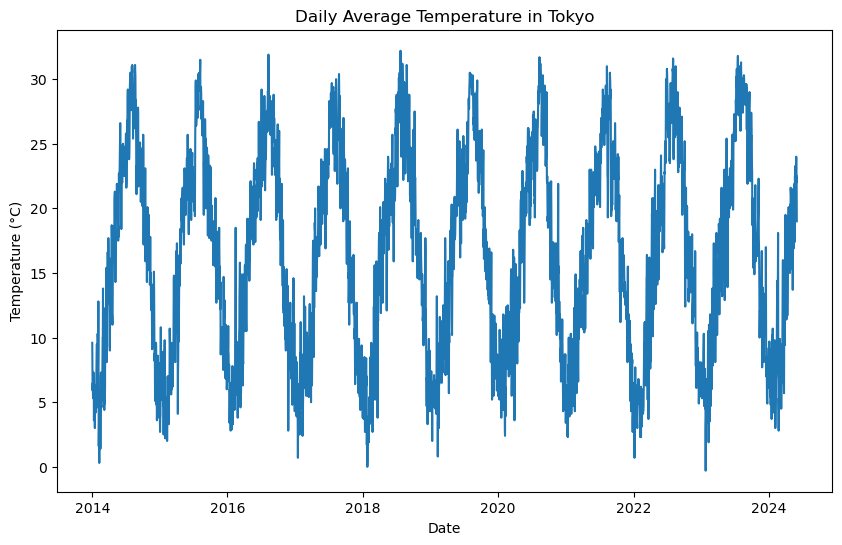

In [210]:
plt.figure(figsize=(10, 6))
plt.plot(tokyo_data.index, tokyo_data['TAVG24'], label='TAVG24 over time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Daily Average Temperature in Tokyo')


In [211]:
# import os
# import glob

# folder_path = '../data/'

# files = glob.glob(os.path.join(folder_path, '*'))

# for file in files:
#     print(f'{file}')

In [212]:
cities = {
    'Amsterdam': '../data/AMSTERDAM SCHIPHOL_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Atlanta': '../data/Atlanta-Hartsfield International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Boston': '../data/Boston-Logan International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Burbank': '../data/Burbank-Glendale-Pasadena Airport _DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Chicago': '../data/Chicago OHare International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Cincinnati': '../data/Cincinnati-Northern Kentucky International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Dallas': '../data/Dallas-Fort Worth International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Essen': '../data/ESSEN_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Houston': '../data/Houston-George Bush Intercontinental Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Las Vegas': '../data/Las Vegas Mccarran Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'London': '../data/LONDON HEATHROW_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Minneapolis': '../data/Minneapolis-Saint Paul International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'New York': '../data/New York LaGuardia Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Paris': '../data/PARIS ORLY_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Philadelphia': '../data/Philadelphia International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Portland': '../data/Portland International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Sacramento': '../data/Sacramento Executive Airport_DAILY_CLIMATE_BEST_Jan14May24.csv'
    
}

t_max = pd.DataFrame()
t_min = pd.DataFrame()
t_avg = pd.DataFrame()

for city, file in cities.items():
    data = pd.read_csv(file)
    data['Date'] = pd.to_datetime(data['DATE'], format='%Y-%m-%d')
    data = data.set_index('Date')
    
    t_max[city] = data[['DAILY_MAX_TEMP']]
    t_min[city] = data[['DAILY_MIN_TEMP']]
    t_avg[city] = t_max[city] + t_min[city]
    
    
t_avg.head()

,Amsterdam,Atlanta,Boston,Burbank,Chicago,Cincinnati,Dallas,Essen,Houston,Las Vegas,London,Minneapolis,New York,Paris,Philadelphia,Portland,Sacramento
Date,,,,,,,,,,,,,,,,,
2014-01-01,13.1,82.0,48.0,121.0,32.0,70.0,100.0,12.9,111.0,106.0,17.0,-7.0,58.0,16.9,64.0,78.0,93.0
2014-01-02,15.5,78.0,28.0,134.0,20.0,50.0,68.0,15.7,96.0,106.0,17.2,-6.0,50.0,19.5,57.0,81.0,101.0
2014-01-03,17.0,57.0,16.0,125.0,8.0,21.0,77.0,17.2,85.0,102.0,17.2,19.0,29.0,22.2,33.0,78.0,100.0
2014-01-04,14.9,60.0,29.0,120.0,50.0,50.0,111.0,16.0,101.0,103.0,14.8,33.0,37.0,19.9,37.0,68.0,102.0
2014-01-05,10.3,86.0,62.0,124.0,26.0,72.0,71.0,12.8,100.0,92.0,13.2,-22.0,75.0,15.0,71.0,74.0,97.0


Text(0, 0.5, 'Temperature (°C)')

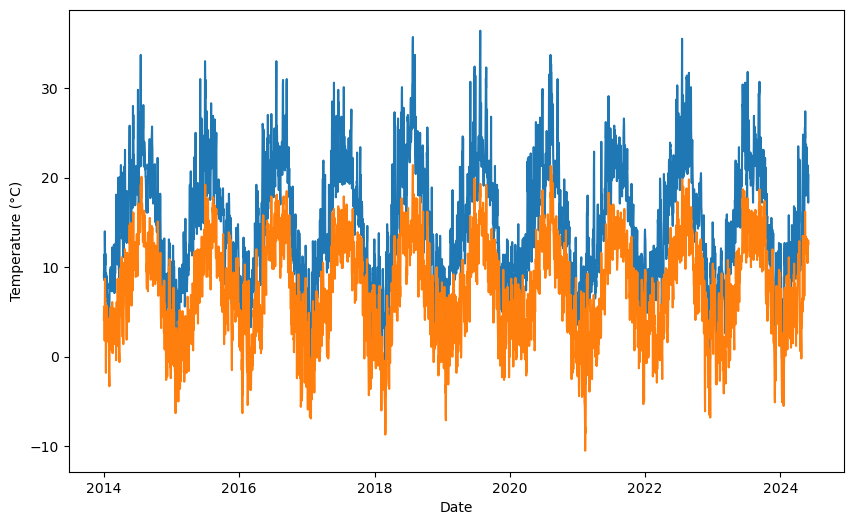

In [213]:
plt.figure(figsize=(10, 6))
plt.plot(t_max.index, t_max['Amsterdam'], label='Amsterdam')
plt.plot(t_min.index, t_min['Amsterdam'], label='Amsterdam')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

Text(0, 0.5, 'Temperature (°C)')

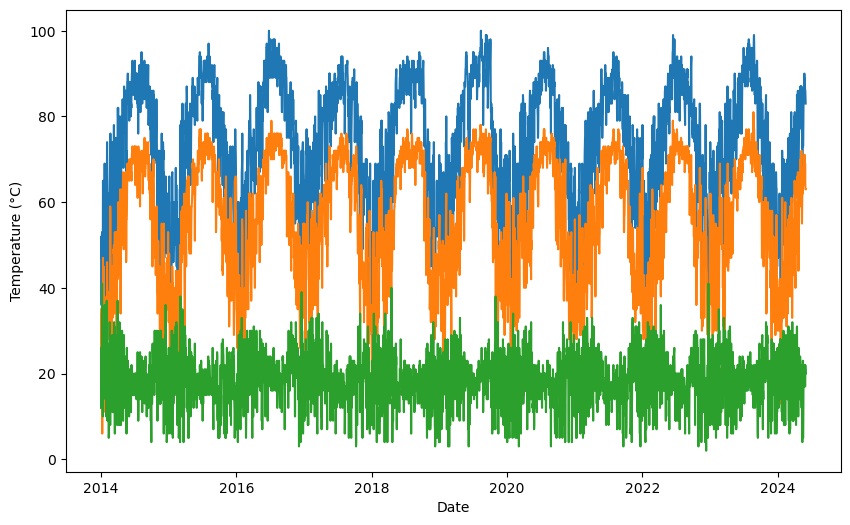

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(t_max.index, t_max['Atlanta'], label='Atlanta')
plt.plot(t_min.index, t_min['Atlanta'], label='Atlanta')

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

In [216]:
autocorr = t_avg['Amsterdam'].corr(t_avg['Paris'])
autocorr

0.9386959184092695

In [219]:
autocorr = t_avg['Boston'].corr(t_avg['Atlanta'])
autocorr

0.8628368497864359